In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing Data

In [203]:
df = pd.read_csv('Test_Cricket_Players.csv')
df.head()

,Name,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 10,Opposition,Ground,Start Date,Unnamed: 14,Result
0,MS Dhoni,30,83,54,6,0,55.55,7,caught,1,NaN,v Sri Lanka,Chennai,02-Dec-05,Test # 1775,Lost
1,MS Dhoni,5,19,12,1,0,41.66,7,bowled,1,NaN,v Sri Lanka,Delhi,10-Dec-05,Test # 1776,Won
2,MS Dhoni,51*,83,51,5,2,100,8,not out,3,NaN,v Sri Lanka,Delhi,10-Dec-05,Test # 1776,Won
3,MS Dhoni,49,100,62,7,0,79.03,7,lbw,1,NaN,v Sri Lanka,Ahmedabad,18-Dec-05,Test # 1778,Won
4,MS Dhoni,14,26,20,1,0,70,7,lbw,3,NaN,v Sri Lanka,Ahmedabad,18-Dec-05,Test # 1778,Won


In [204]:
df['BF'] = pd.to_numeric(df['BF'], errors='coerce')

In [205]:
df['BF'].head()

0    54.0
1    12.0
2    51.0
3    62.0
4    20.0
Name: BF, dtype: float64

###number of elements in this column 

In [206]:
n_mins = len(df['BF'])
n_mins

452

###No of missing elements in this column

In [207]:
n_mins_na = sum(df['BF'].isna())
n_mins_na

39

###Function to find the percentage of missing values in a column

In [208]:
def empty_perc(df, colname):
  n_vals = len(df[colname])
  df[colname] = pd.to_numeric(df[colname], errors='coerce')
  n_vals_na = sum(df[colname].isna())
  return 100 * n_vals_na / n_vals

##Create a DF mentioning the percentage of missing values in each column

In [209]:
emp_perc_list = list()
for col in num_cols:
  emp_perc = empty_perc(df, col)
  emp_perc_list.append(emp_perc)

emp_df = pd.DataFrame(zip(num_cols, emp_perc_list), columns=['Column', 'Perc_Missing'])
emp_df.sort_values('Perc_Missing', ascending=False)

,Column,Perc_Missing
0,Runs,19.911504
1,Mins,14.159292
2,BF,8.628319
3,4s,8.628319
4,6s,8.628319
5,SR,8.628319
6,Pos,8.628319


In [210]:
num_cols = df.columns[1:8]
num_cols

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos'], dtype='object')

In [211]:
means = list()
for col in num_cols:
  mn = df[col].mean()
  means.append(mn)

means_df = pd.DataFrame(zip(num_cols, means), columns=['Column', 'Mean Value'])
means_df

,Column,Mean Value
0,Runs,36.881215
1,Mins,90.979381
2,BF,66.210654
3,4s,4.237288
4,6s,0.489104
5,SR,53.864140
6,Pos,5.813559


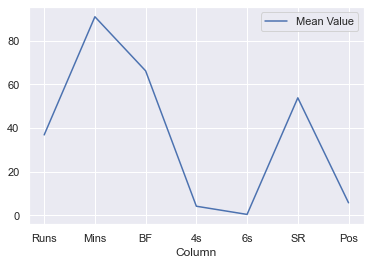

In [212]:
sns.set()
means_df.set_index('Column').plot()

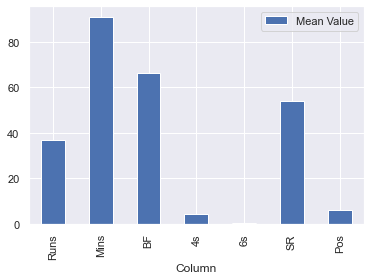

In [213]:
_ = means_df.set_index('Column').plot(kind='bar')

In [214]:
df_mins = df.copy()

In [215]:
mins_avg_pre = df_mins['BF'].mean()
mins_avg_pre

66.21065375302663

In [216]:
df_mins['BF'].fillna(0, inplace=True)

In [217]:
empty_perc(df_mins, 'BF')

0.0

In [218]:
mins_avg_zero = df_mins['BF'].mean()
mins_avg_zero

60.49778761061947

##Store all the mean value 

In [219]:
mins_avgs = dict()

In [220]:
mins_avgs['Pre'] = mins_avg_pre

In [221]:
# mins_mean = df_mins['Mins'].mean()
mins_avgs['Zero'] = mins_avg_zero
mins_avgs

{'Pre': 66.21065375302663, 'Zero': 60.49778761061947}

In [222]:
mins_avg_df = pd.DataFrame(mins_avgs.items())
mins_avg_df.columns = ['Imputation Type', 'Mean Value']
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788


##ploting Horizontal Bar chart of the means

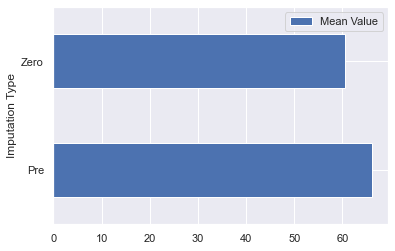

In [223]:
mins_avg_df.set_index('Imputation Type').plot(kind='barh')

In [224]:
order = {'Pre' : 1, 'Zero' : 2}
key = mins_avg_df['Imputation Type'].map(order)
key

0    1
1    2
Name: Imputation Type, dtype: int64

In [225]:
key.argsort()

0    0
1    1
Name: Imputation Type, dtype: int64

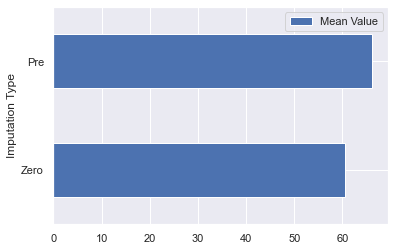

In [226]:
mins_avg_df.iloc[key.argsort()[::-1]].set_index('Imputation Type').plot(kind='barh')

##impute the empty cells with the existing mean of the column

In [227]:
df_mins2 = df.copy()

In [228]:
df_mins2['BF'].fillna(mins_avg_pre, inplace=True)

In [229]:
mins_avg_mean = df_mins2['BF'].mean()
mins_avg_mean

66.21065375302663

In [230]:
len(mins_avg_df.index)

2

In [231]:
n_rows = len(mins_avg_df.index)
mins_avg_df.loc[n_rows] = ['Mean', mins_avg_mean] # Number of entries in RHS should match the number of columns
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788
2,Mean,66.210654


In [232]:
order['Mean'] = 3
order

{'Pre': 1, 'Zero': 2, 'Mean': 3}

In [233]:
col_name = 'Imputation Type'
key = mins_avg_df[col_name].map(order)
key

0    1
1    2
2    3
Name: Imputation Type, dtype: int64

In [234]:
key.argsort()

0    0
1    1
2    2
Name: Imputation Type, dtype: int64

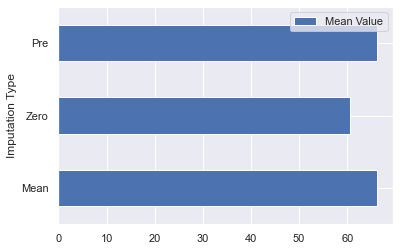

In [235]:
col_name = 'Imputation Type'
key = mins_avg_df[col_name].map(order)
mins_avg_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')

In [236]:
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788
2,Mean,66.210654


##Impute missing values with the Maximum value from the column

In [237]:
df_mins3 = df.copy()
mins_max = df_mins3['BF'].max()
mins_max

366.0

In [238]:
df_mins3['BF'].fillna(mins_max, inplace=True)
mins_avg_max = df_mins3['BF'].mean()
order['Max'] = 4

n_rows = len(mins_avg_df.index)
mins_avg_df.loc[n_rows] = ['Max', mins_avg_max]
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788
2,Mean,66.210654
3,Max,92.077434


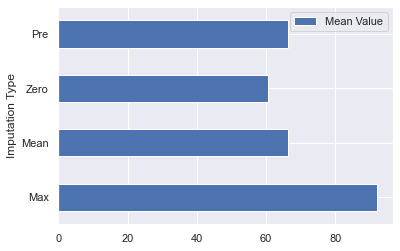

In [239]:
key = mins_avg_df[col_name].map(order)
mins_avg_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')

##Impute the missing values with the median of existing values

In [240]:
df_mins4 = df.copy()
mins_median = df_mins4['BF'].median()
mins_median

45.0

In [241]:
df_mins4['BF'].fillna(mins_median, inplace=True)
mins_avg_median = df_mins4['BF'].mean()
order['Median'] = 5

n_rows = len(mins_avg_df.index)
mins_avg_df.loc[n_rows] = ['Median', mins_avg_median]
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788
2,Mean,66.210654
3,Max,92.077434
4,Median,64.380531


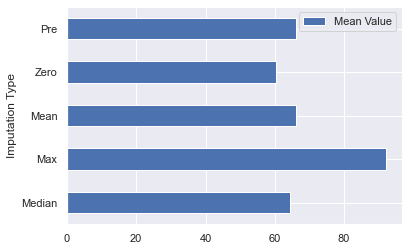

In [242]:
key = mins_avg_df[col_name].map(order)
mins_avg_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')

##Droping empty cells [ rows ]

In [243]:
df_mins5 = df.copy()
df_mins5.dropna(subset=['BF'], inplace=True)

mins_avg_drop = df_mins5['BF'].mean()
order['Drop'] = 6

n_rows = len(mins_avg_df.index)
mins_avg_df.loc[n_rows] = ['Drop', mins_avg_drop]
mins_avg_df

,Imputation Type,Mean Value
0,Pre,66.210654
1,Zero,60.497788
2,Mean,66.210654
3,Max,92.077434
4,Median,64.380531
5,Drop,66.210654


##Annotating the bar graphs with their values

Bbox(x0=0.0, y0=-0.25, x1=66.21065375302663, y1=0.25)
Bbox(x0=0.0, y0=0.75, x1=64.38053097345133, y1=1.25)
Bbox(x0=0.0, y0=1.75, x1=92.07743362831859, y1=2.25)
Bbox(x0=0.0, y0=2.75, x1=66.21065375302663, y1=3.25)
Bbox(x0=0.0, y0=3.75, x1=60.49778761061947, y1=4.25)
Bbox(x0=0.0, y0=4.75, x1=66.21065375302663, y1=5.25)


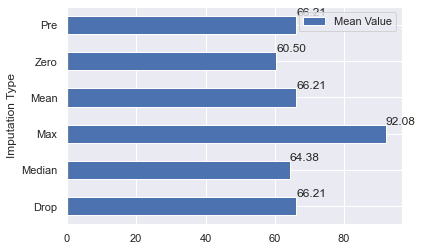

In [244]:
key = mins_avg_df[col_name].map(order)
ax = mins_avg_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')
# From : https://stackoverflow.com/a/39621872/4106458

for p in ax.patches:
  b = p.get_bbox()
  print(b)
  val = f"{b.x1:.2f}"
  #ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
  ax.annotate(val, (b.x1, b.y1))

##Impute based on Player's name

In [245]:
df_vals = df.groupby('Name').count()['BF']
df_vals

Name
MS Dhoni           144
Ravindra Jadeja     71
Rohit Sharma        53
Virat Kohli        145
Name: BF, dtype: int64

###Number of entries missing for each player

In [246]:
# level=0 here implies groupby the elements in index
# level=1 would have implied to groupby the elements in the second index in a multi-index dataframe
df_missing = df.set_index('Name').isna().sum(level=0)['BF']
df_missing

Name
MS Dhoni           20.0
Virat Kohli         5.0
Ravindra Jadeja    12.0
Rohit Sharma        2.0
Name: BF, dtype: float64

##Number of entries that are valid values for each player

In [247]:
df_good = df_vals - df_missing
df_good

Name
MS Dhoni           124.0
Ravindra Jadeja     59.0
Rohit Sharma        51.0
Virat Kohli        140.0
Name: BF, dtype: float64

##Df representing the number of good, missing and total entries for each player

In [248]:
df_info_mins = pd.DataFrame({'Good': df_good, 'Missing': df_missing, 'Total' : df_vals,})
df_info_mins

,Good,Missing,Total
MS Dhoni,124.0,20.0,144
Ravindra Jadeja,59.0,12.0,71
Rohit Sharma,51.0,2.0,53
Virat Kohli,140.0,5.0,145


##Deduce the percentage of missing values for each playe

In [249]:
df_info_mins['Perc_Missing'] = 100 * df_info_mins['Missing'] / df_info_mins['Total']
# df_info_mins
df_info_mins.sort_values('Perc_Missing', ascending=False)

,Good,Missing,Total,Perc_Missing
Ravindra Jadeja,59.0,12.0,71,16.901408
MS Dhoni,124.0,20.0,144,13.888889
Rohit Sharma,51.0,2.0,53,3.773585
Virat Kohli,140.0,5.0,145,3.448276


##Finding the median for each player and add it to the DF

In [250]:
df_info_mins_median = df.groupby('Name').median()['BF']
df_info_mins_median

Name
MS Dhoni           42.0
Ravindra Jadeja    31.0
Rohit Sharma       55.0
Virat Kohli        60.0
Name: BF, dtype: float64

In [251]:
df_info_mins['Median'] = df_info_mins_median
df_info_mins.sort_values('Perc_Missing', ascending=False)

,Good,Missing,Total,Perc_Missing,Median
Ravindra Jadeja,59.0,12.0,71,16.901408,31.0
MS Dhoni,124.0,20.0,144,13.888889,42.0
Rohit Sharma,51.0,2.0,53,3.773585,55.0
Virat Kohli,140.0,5.0,145,3.448276,60.0


In [252]:
df_info_mins['Mean'] = df.groupby('Name').mean()['BF']
df_info_mins.sort_values('Perc_Missing', ascending=False)

,Good,Missing,Total,Perc_Missing,Median,Mean
Ravindra Jadeja,59.0,12.0,71,16.901408,31.0,41.281690
MS Dhoni,124.0,20.0,144,13.888889,42.0,57.284722
Rohit Sharma,51.0,2.0,53,3.773585,55.0,68.169811
Virat Kohli,140.0,5.0,145,3.448276,60.0,86.565517


##Impute each player with their corresponding median values

In [253]:
df_test = df.copy()

In [254]:
def impute_with_median(col):
  return col.fillna(col.median())

df_test['BF'] = df_test.groupby('Name')['BF'].transform(impute_with_median)

In [255]:
df_test.groupby('Name')['BF'].mean()
df_info_mins['New Mean'] = df_test.groupby('Name')['BF'].mean()
df_info_mins.sort_values('Perc_Missing', ascending=False)

,Good,Missing,Total,Perc_Missing,Median,Mean,New Mean
Ravindra Jadeja,59.0,12.0,71,16.901408,31.0,41.281690,39.795181
MS Dhoni,124.0,20.0,144,13.888889,42.0,57.284722,55.420732
Rohit Sharma,51.0,2.0,53,3.773585,55.0,68.169811,67.690909
Virat Kohli,140.0,5.0,145,3.448276,60.0,86.565517,85.680000


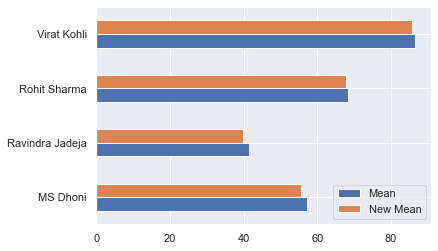

In [256]:
df_info_mins[['Mean', 'New Mean']].plot(kind='barh')

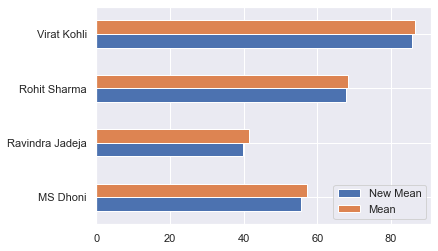

In [257]:
df_info_mins[['New Mean', 'Mean']].plot(kind='barh')

In [258]:
#df_mins2

df_info_mins['All Player Mean'] = df_mins2.groupby('Name')['BF'].mean()
df_info_mins.sort_values('Perc_Missing', ascending=False)

,Good,Missing,Total,Perc_Missing,Median,Mean,New Mean,All Player Mean
Ravindra Jadeja,59.0,12.0,71,16.901408,31.0,41.281690,39.795181,44.885878
MS Dhoni,124.0,20.0,144,13.888889,42.0,57.284722,55.420732,58.373250
Rohit Sharma,51.0,2.0,53,3.773585,55.0,68.169811,67.690909,68.098569
Virat Kohli,140.0,5.0,145,3.448276,60.0,86.565517,85.680000,85.887022


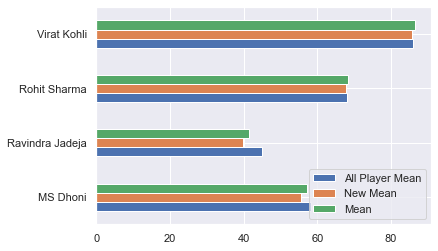

In [259]:
df_info_mins[['All Player Mean', 'New Mean', 'Mean']].plot(kind='barh')